In [2]:
! pip install yfinance

  Using cached multitasking-0.0.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached peewee-3.19.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl.metadata (13 kB)
Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl (1.6 MB)
Using cached peewee-3.19.0-py3-none-any.whl (411 kB)
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=8f0ec2fa6380b15841008a0b02636c29fde136f9f50ade4d5e4b9bf8509214d8
  Stored in directory: c:\users\thedo\appdata\local\pip\cache\wheels\1e\df\0f\e2bbb22d689b30c681feb5410ab64a2523437b34c8ecfc6476
Successfully built multitasking

   ---------------------------------------- 0/5 [peewee]
   ---------------------------------------- 0/5 [peewee]
   ---------------- ----------------------- 2/5 [websockets]
   ---------------- ----------------------- 2/5 [websockets]
   ---------------- --------------

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as y
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:


def downlaod_stocks_data(ticker, start, end):
    df = y.download(ticker, start=start, end = end)

    
    
    return df


df = downlaod_stocks_data('AAPL', '2000-01-01', '2025-12-31')


[*********************100%***********************]  1 of 1 completed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6538 entries, 2000-01-03 to 2025-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6538 non-null   float64
 1   (High, AAPL)    6538 non-null   float64
 2   (Low, AAPL)     6538 non-null   float64
 3   (Open, AAPL)    6538 non-null   float64
 4   (Volume, AAPL)  6538 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 306.5 KB


In [6]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2000-01-03,0.839280,0.843498,0.762428,0.786328,535796800
2000-01-04,0.768521,0.829440,0.758680,0.811633,512377600
2000-01-05,0.779767,0.828971,0.772269,0.777892,778321600
2000-01-06,0.712287,0.802260,0.712287,0.795700,767972800
2000-01-07,0.746027,0.757274,0.716037,0.723534,460734400


In [7]:
def validate_data(data):
    validation_report={
        'total_rows': len(data),
        'total_cols': len(data.columns),
        'missing_values': data.isnull().sum().to_dict()
    }
    return validation_report

report = validate_data(df)
print(f'Data Validation report \n {report}')

Data Validation report 
 {'total_rows': 6538, 'total_cols': 5, 'missing_values': {('Close', 'AAPL'): 0, ('High', 'AAPL'): 0, ('Low', 'AAPL'): 0, ('Open', 'AAPL'): 0, ('Volume', 'AAPL'): 0}}


In [8]:
train = df[(df.index.year < 2024) & (df.index.year >= 2000)]
test = df[df.index.year >= 2024]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2000-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6037 non-null   float64
 1   (High, AAPL)    6037 non-null   float64
 2   (Low, AAPL)     6037 non-null   float64
 3   (Open, AAPL)    6037 non-null   float64
 4   (Volume, AAPL)  6037 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 283.0 KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2024-01-02 to 2025-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   501 non-null    float64
 1   (High, AAPL)    501 non-null    float64
 2   (Low, AAPL)     501 non-null    float64
 3   (Open, AAPL)    501 non-null    float64
 4   (Volume, AAPL)  501 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.5 KB


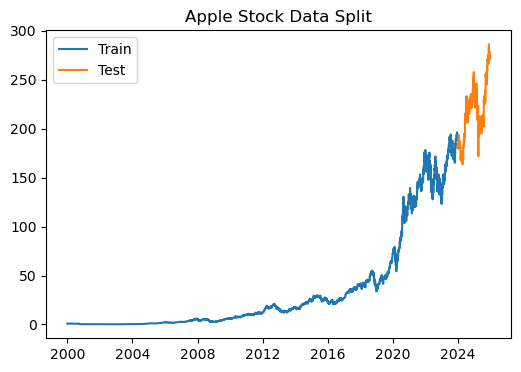

In [11]:
plt.figure(figsize=(6,4))
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label = 'Test')
plt.legend()
plt.title('Apple Stock Data Split')
plt.show()

In [12]:
# feature scaling:
# feature scaling:


scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(train['Close'].values.reshape(-1, 1))
training_set_scaled

array([[0.00327726],
       [0.00291635],
       [0.00297371],
       ...,
       [0.97493839],
       [0.97711094],
       [0.97180554]])

In [13]:
X_train = []
y_train = []

for i in range(80, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-80: i, 0])
    y_train.append(training_set_scaled[i:0])

X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(5957, 80)
(5957, 0, 1)


In [14]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(5957, 80, 1)


In [ ]:
import tensorflow as tf


model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units= 128, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=32, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 1))

model.summary()
